In [29]:
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [43]:
# set global variables
DATA_DIR = "../data/dataset"
plot_dir = "../data/figures"

In [3]:
# load the dataset
df = pd.read_csv(os.path.join(DATA_DIR, "train_data.csv"))
df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,450407,Cash loans,F,N,Y,1,67500.0,227520.0,11065.5,180000.0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,0
1,271298,Cash loans,M,Y,Y,1,247500.0,1882372.5,65560.5,1719000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0,0
2,122238,Cash loans,M,Y,Y,1,180000.0,101880.0,10827.0,90000.0,...,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0,0
3,305311,Cash loans,M,N,N,0,81000.0,405000.0,20677.5,405000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0
4,414121,Cash loans,F,N,Y,0,157500.0,888840.0,29506.5,675000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0


In [8]:
numerical_columns = list(df.select_dtypes(exclude=["object"]).columns)
numerical_columns = numerical_columns[2:-1]
print(f"There are {len(numerical_columns)} columns")

There are 103 columns


In [9]:
df_num = df[numerical_columns]
df_num.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,67500.0,227520.0,11065.5,180000.0,0.018634,-17210,-774,-5580.0,-755,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
1,247500.0,1882372.5,65560.5,1719000.0,0.018850,-18640,-96,-5711.0,-2175,25.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
2,180000.0,101880.0,10827.0,90000.0,0.022625,-14649,-6130,-1776.0,-4568,9.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0
3,81000.0,405000.0,20677.5,405000.0,0.035792,-12762,-5891,-6430.0,-4618,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
4,157500.0,888840.0,29506.5,675000.0,0.018801,-16329,-345,-1413.0,-4624,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


# Generate Probability Plots (P-P Plots)

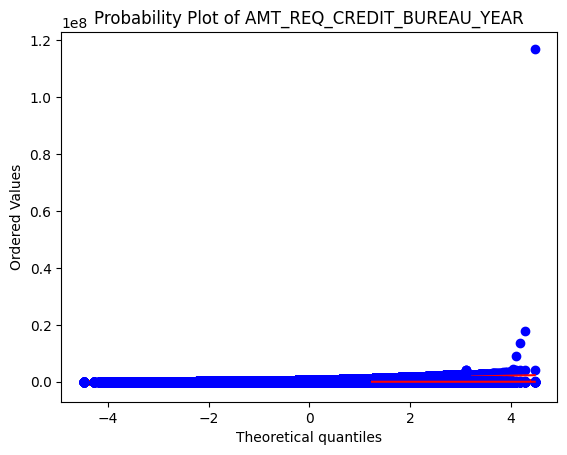

In [51]:
for column_name in numerical_columns:
    stats.probplot(df[column_name], plot=plt)
    plt.title(f"Probability Plot of {column_name}")
    image_name = column_name + "_pplot" + ".jpg"
    plt.savefig(os.path.join(plot_dir, image_name))

# Generate Box Plots

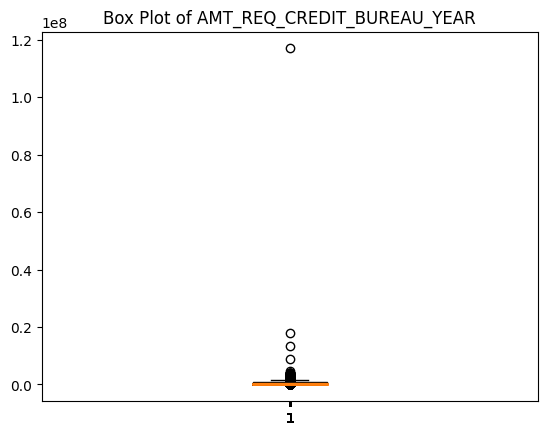

In [52]:
for column_name in numerical_columns:
    plt.boxplot(df[column_name])
    plt.title(f"Box Plot of {column_name}")
    image_name = column_name + "_boxplot" + ".jpg"
    plt.savefig(os.path.join(plot_dir, image_name))